In [120]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df=pd.read_csv("C:/AI workforce/pca/data.csv",on_bad_lines='skip',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [121]:
columns = [
    "state", "county", "community", "communityname", "fold",
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian",
    "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
    "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc",
    "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed",
    "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv",
    "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par",
    "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
    "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup",
    "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt",
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
    "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent",
    "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT",
    "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop",
    "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
    "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
    "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz",
    "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars",
    "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]


In [122]:
df.columns=columns

In [123]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [124]:
import numpy as np
df = df.replace("?", np.nan)

In [125]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [126]:
df.to_csv("C:/AI workforce/pca/maindata.csv", index=False)


In [127]:
df.isnull().sum()

state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64

In [128]:
drop_cols = ['state','county','community','communityname','fold']
df_clean = df.drop(columns=drop_cols, errors='ignore')


In [129]:
X = df_clean.drop(columns=['ViolentCrimesPerPop'], errors='ignore')
y = df_clean['ViolentCrimesPerPop']

In [130]:
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())

In [131]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [134]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

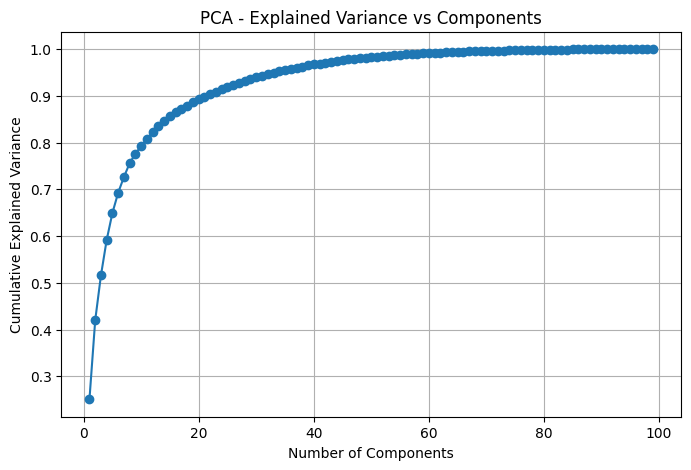

In [135]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Components')
plt.grid(True)
plt.show()

In [136]:
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print("Number of components for 95% variance:", n_components_95)


Number of components for 95% variance: 34


In [137]:
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [138]:

print("Original shape (before PCA):", X_train_scaled.shape)
print("Reduced shape (after PCA):", X_train_pca.shape)
print("Number of PCA components used:", X_train_pca.shape[1])


Original shape (before PCA): (1595, 99)
Reduced shape (after PCA): (1595, 34)
Number of PCA components used: 34


In [139]:
components = pd.DataFrame(pca.components_, columns=X_train.columns)

top_features_per_pc = {}
for i, row in components.iterrows():
    top_features = row.abs().sort_values(ascending=False).head(5).index.tolist()
    top_features_per_pc[f"PC{i+1}"] = top_features


for pc, features in top_features_per_pc.items():
    print(pc, ":", features)

PC1 : ['medFamInc', 'medIncome', 'pctWInvInc', 'PctPopUnderPov', 'PctKids2Par']
PC2 : ['PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn']
PC3 : ['PersPerOccupHous', 'PersPerFam', 'householdsize', 'PersPerOwnOccHous', 'PersPerRentOccHous']
PC4 : ['PctSameCity85', 'agePct12t29', 'agePct16t24', 'PctSameHouse85', 'agePct12t21']
PC5 : ['population', 'numbUrban', 'LandArea', 'NumUnderPov', 'NumIlleg']
PC6 : ['PctEmplProfServ', 'TotalPctDiv', 'FemalePctDiv', 'MalePctDivorce', 'MedYrHousBuilt']
PC7 : ['racepctblack', 'PctIlleg', 'PctEmplManu', 'PctEmploy', 'PctHousOccup']
PC8 : ['PctHousOccup', 'racepctblack', 'PctEmplManu', 'MedYrHousBuilt', 'racePctWhite']
PC9 : ['PctImmigRec8', 'PctImmigRec10', 'PctImmigRec5', 'PctImmigRecent', 'pctWFarmSelf']
PC10 : ['MedOwnCostPctIncNoMtg', 'PctWorkMom', 'PctWorkMomYoungKids', 'PctHousOccup', 'MedOwnCostPctInc']
PC11 : ['pctWRetire', 'pctWFarmSelf', 'PctImmigRec5', 'MedRentPctHousInc', 'PctImmigRecent']
PC12 : ['PctWorkMo

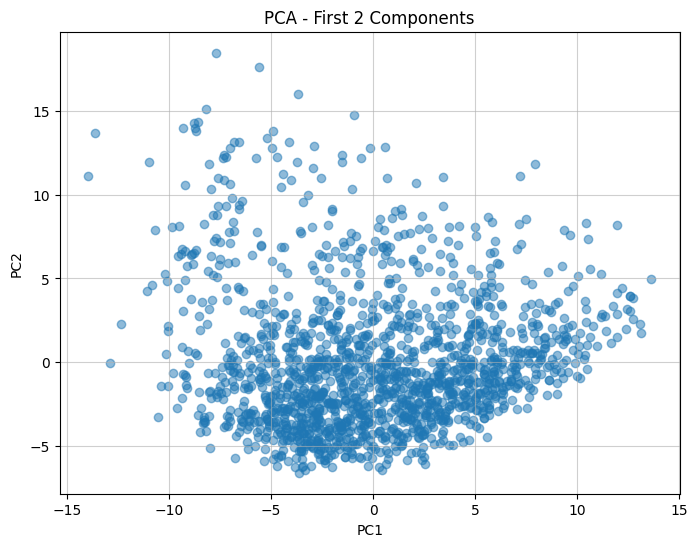

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Components")
plt.grid(alpha=0.6)
plt.show()


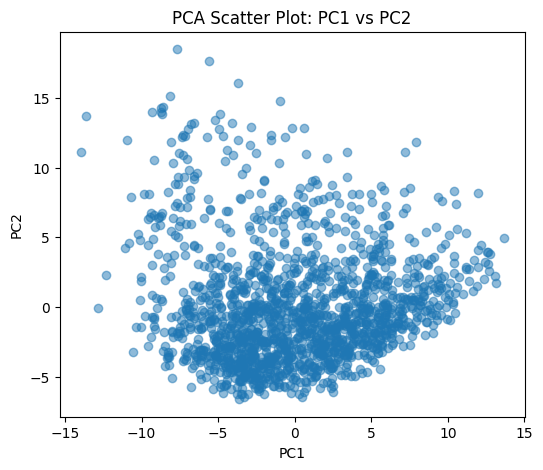

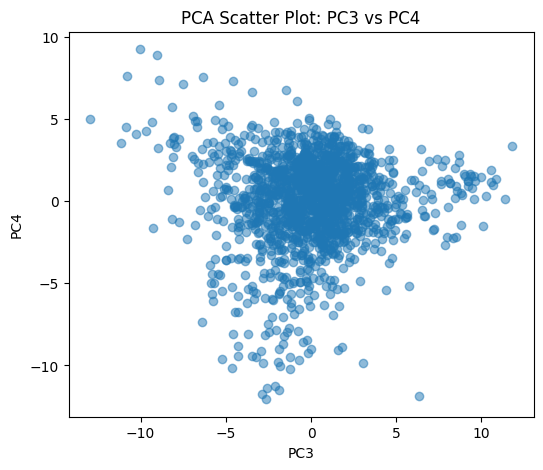

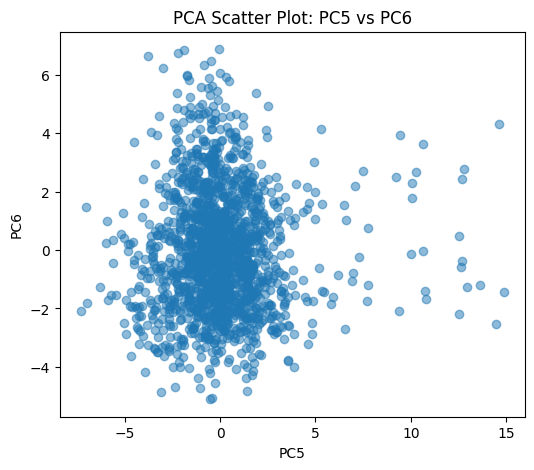

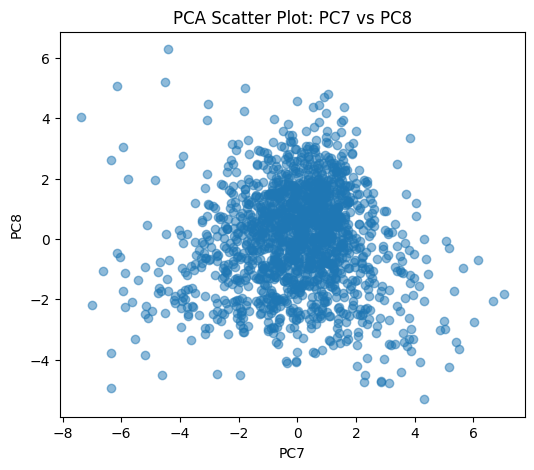

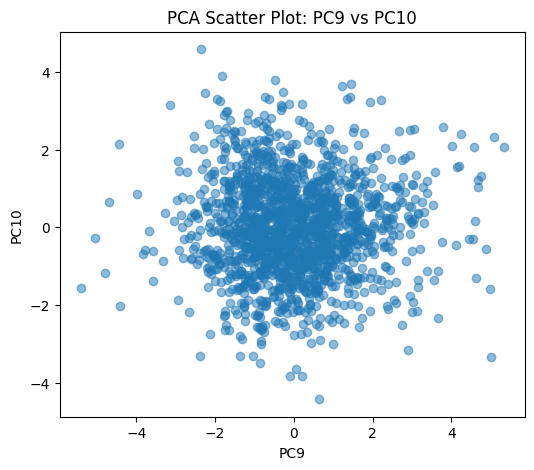

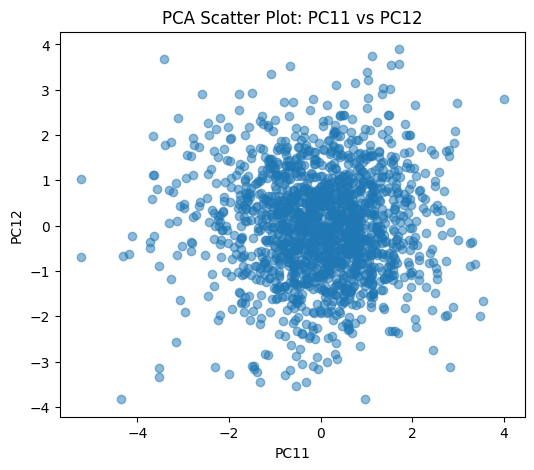

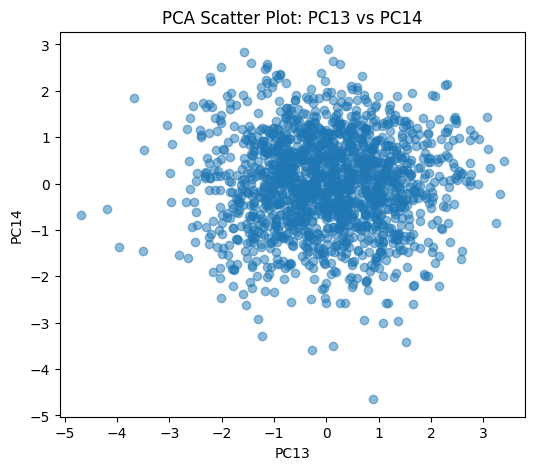

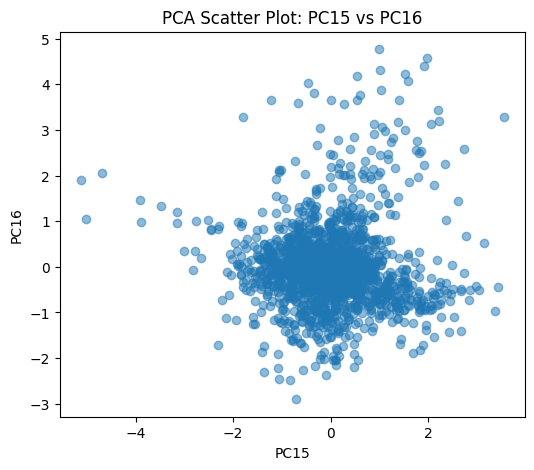

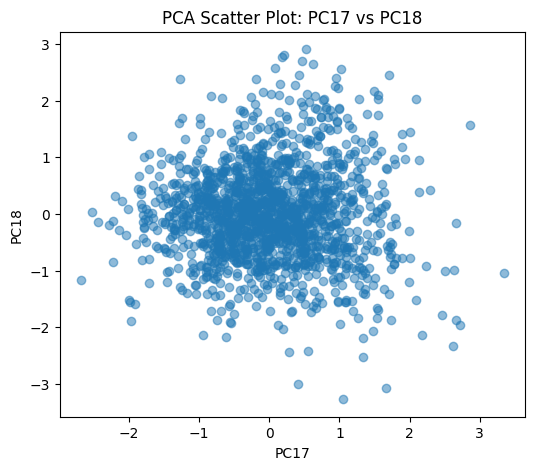

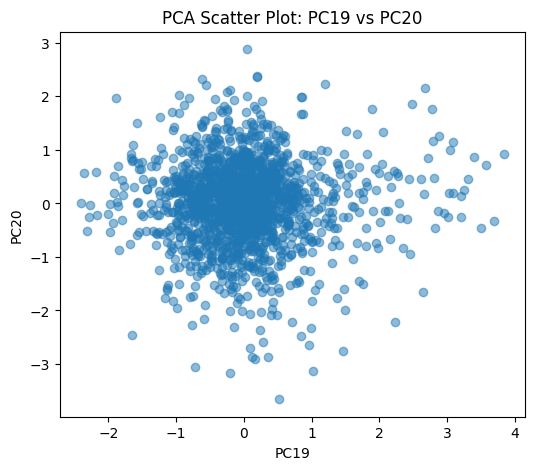

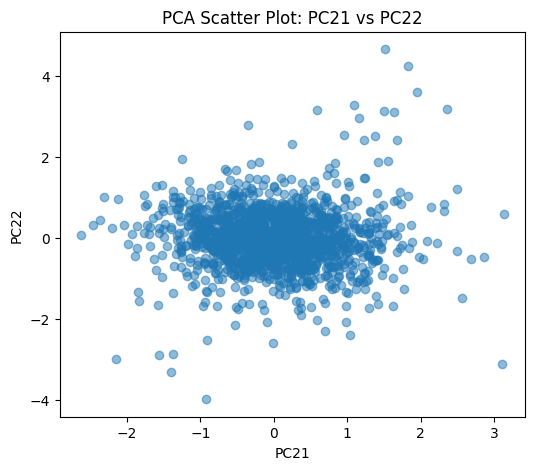

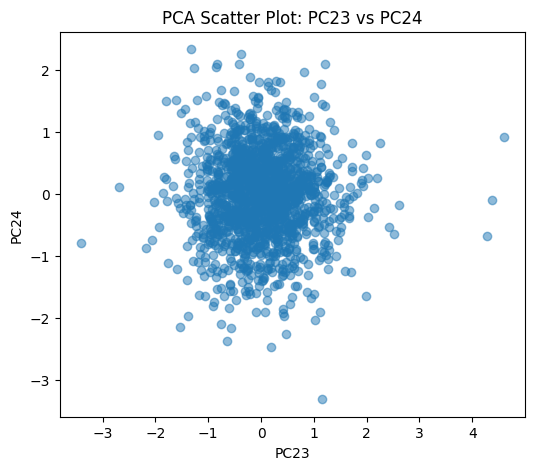

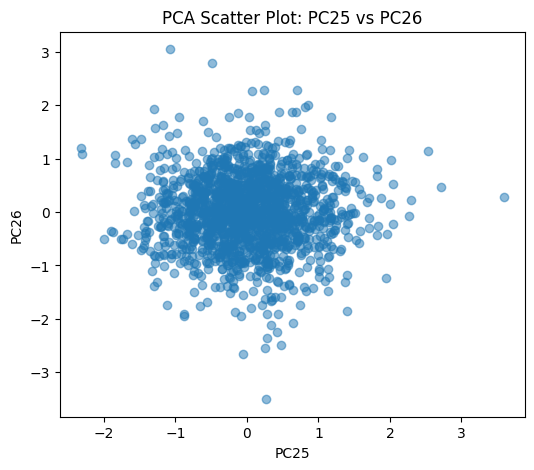

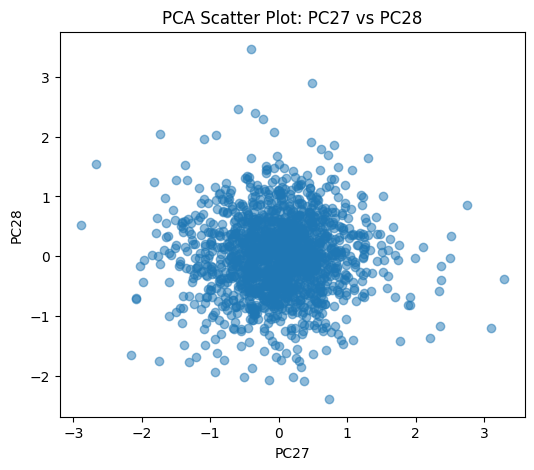

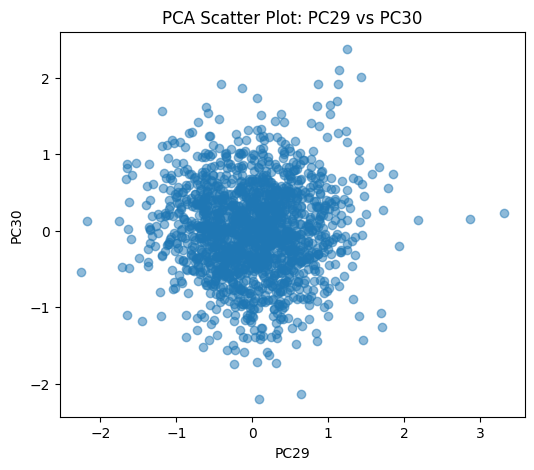

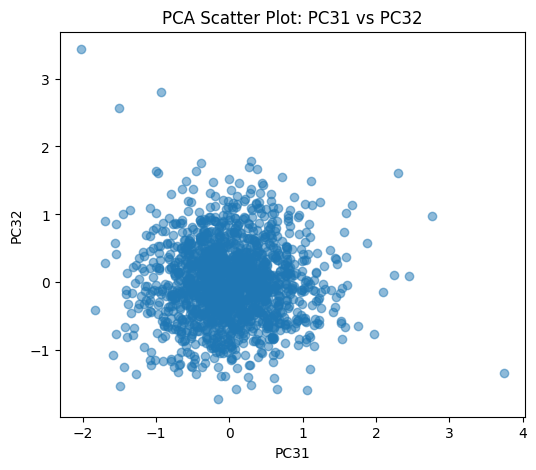

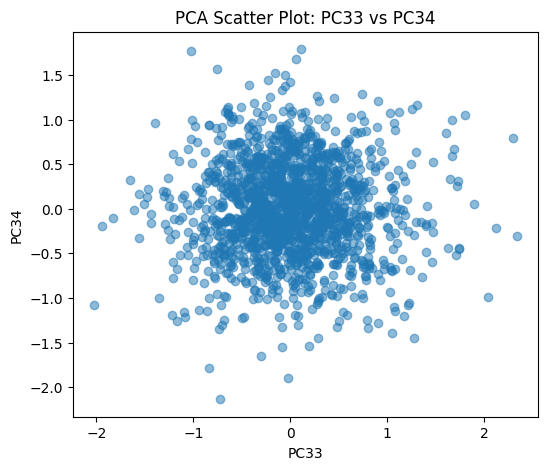

In [154]:
for i in range(0, X_train_pca.shape[1]-1, 2):
    plt.figure(figsize=(6,5))
    plt.scatter(X_train_pca[:,i], X_train_pca[:,i+1], alpha=0.5)
    plt.xlabel(f"PC{i+1}")
    plt.ylabel(f"PC{i+2}")
    plt.title(f"PCA Scatter Plot: PC{i+1} vs PC{i+2}")
    plt.show()


Regression:

In [144]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=10000),
    "SVR": SVR(kernel="rbf"),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}


results_df = pd.DataFrame(results).T
print("\nModel Comparison (after PCA):")
print(results_df)


Model Comparison (after PCA):
                        R²      RMSE
Linear            0.634877  0.132242
Ridge             0.634900  0.132237
Lasso             0.633766  0.132443
SVR               0.565012  0.144340
RandomForest      0.621076  0.134718
GradientBoosting  0.606813  0.137230


Tuning ridge:

In [145]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-4, 4, 100) 


ridge_cv = RidgeCV(alphas=alphas, scoring="r2", cv=5)
ridge_cv.fit(X_train_pca, y_train)


print("Best alpha selected:", ridge_cv.alpha_)


y_pred_ridge = ridge_cv.predict(X_test_pca)


r2 = r2_score(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Tuned Ridge R²:", r2)
print("Tuned Ridge RMSE:", rmse)

Best alpha selected: 242.01282647943833
Tuned Ridge R²: 0.6372195265324082
Tuned Ridge RMSE: 0.13181669747187333


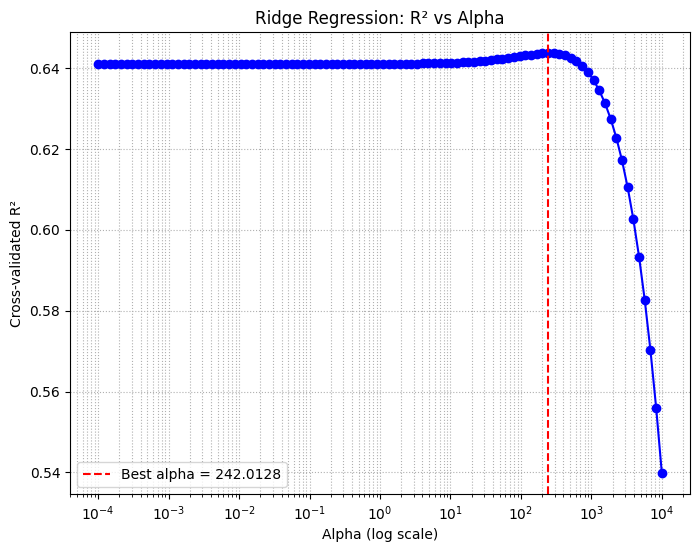

In [146]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


r2_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
 
    scores = cross_val_score(ridge, X_train_pca, y_train, cv=5, scoring="r2")
    r2_scores.append(scores.mean())


plt.figure(figsize=(8,6))
plt.semilogx(alphas, r2_scores, marker="o", color="b")
plt.axvline(ridge_cv.alpha_, color="r", linestyle="--", label=f"Best alpha = {ridge_cv.alpha_:.4f}")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Cross-validated R²")
plt.title("Ridge Regression: R² vs Alpha")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()
